# Gaussian Location Model

Notebook for convergence of the 1-Wasserstein distance

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

     |████████████████████████████████| 368kB 3.4MB/s 
     |████████████████████████████████| 430kB 3.2MB/s 


### Imports

In [ ]:
! pip install qmcpy --quiet

In [ ]:
import numpy as np
import qmcpy

### Sampling

In [ ]:
np.random.seed(111)

Set parameters:

In [ ]:
n = [ 2**j for j in range(3,13) ]       # number of simulated samples - powers of 2
m = 2**13                               # number of true samples
num = 25                                # numbers of repetitions for MC and RQMC
theta = np.ones(1)                      # true theta
d = len(theta)                          # dimensions of data
s = 2                                   # standard deviation of the model
l = -1                                  # lengthscale (l=-1 for median heuristic)

Sample from the Gaussian location model:

In [ ]:
y = sample_gaussian('MC',m,d,s,theta)

### 1-Wasserstein distance convergence

Define the QMC sequence:

In [ ]:
qmc = qmcpy.Halton(d)
qmc_1 = qmcpy.Halton(d+1) # for odd numbers of parameters

Calculate 1-Wasserstein distance for varying $n$:

In [ ]:
W_mc,W_qmc,W_rqmc,W_min_mc,W_max_mc,W_min_rqmc,W_max_rqmc = W_conv('gaussian',n,m,num,d,y,theta,s=2)

sample size:  8
sample size:  16
sample size:  32
sample size:  64
sample size:  128
sample size:  256
sample size:  512
sample size:  1024
sample size:  2048


/usr/local/lib/python3.6/dist-packages/ot/lp/__init__.py:421: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  check_result(result_code)


sample size:  4096


Plot the 1-Wasserstein distance against $n$:

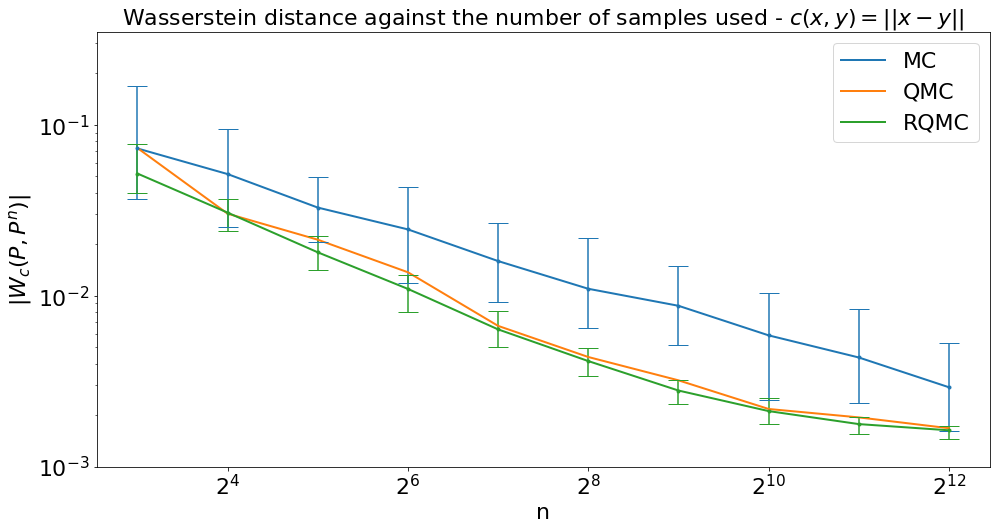

In [ ]:
plot_W_conv(d,(16,8),W_mc,W_qmc,W_rqmc,'MC','QMC','RQMC',W_min_mc,W_max_mc,W_min_rqmc,W_max_rqmc)